
# **Comparing Images**

**In this lesson we'll learn:**
1. Compare Images using Mean Squared Error (MSE)
2. UCompare Images using Structual Similarity

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

def imshow(image, title="", size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)


firework1 shape: (247, 332, 3)
firework2 shape before resizing: (249, 334, 3)
firework2 shape after resizing: (247, 332, 3)


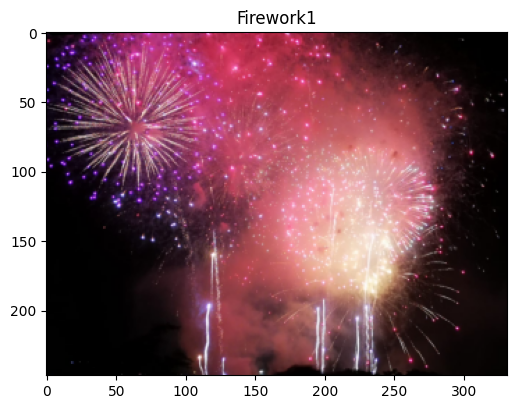

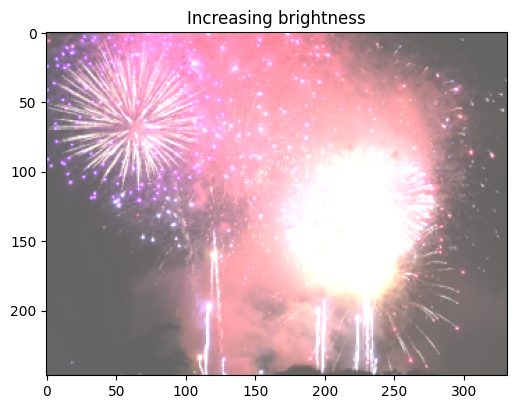

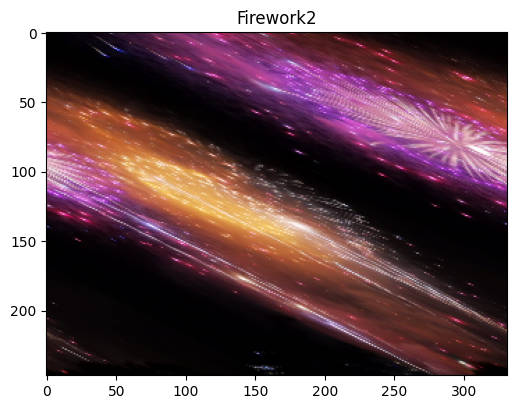

In [27]:
firework1= cv2.imread('images/firework.png')
firework2= cv2.imread('images/firework2.png')

print('firework1 shape:', firework1.shape)
print('firework2 shape before resizing:', firework2.shape)
firework2.resize(firework1.shape)
print('firework2 shape after resizing:', firework2.shape)

M = np.ones(firework1.shape, dtype = "uint8") * 100 
firework1b = cv2.add(firework1, M)

imshow(firework1, 'Firework1')
imshow(fireworks1b, 'Increasing brightness')
imshow(firework2, 'Firework2')


**Mean Squared Error (MSE)**

The MSE between the two images is the sum of the squared difference between the two images. This can easily be implemented with numpy.

The lower the MSE the more similar the images are.

In [28]:
def mse(image1, image2):
    # Images must be of the same dimension
    error = np.sum((image1.astype("float") - image2.astype("float")) ** 2)
    error /= float(image1.shape[0] * image1.shape[1])

    return error

In [29]:
def compare(image1, image2):
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    print('MSE = {:.2f}'.format(mse(image1, image2)))
    print('SS = {:.2f}'.format(structural_similarity(image1, image2)))



In [30]:
# When they're the same
compare(firework1, firework1)





MSE = 0.00
SS = 1.00


In [31]:
compare(firework1, firework2)


MSE = 6330.70
SS = 0.16


In [32]:
compare(firework1, firework1b)


MSE = 8853.43
SS = 0.52


In [33]:
compare(firework2, firework1b)

MSE = 17077.44
SS = 0.09
